## Predicting Flight Delays
### Exploratory Data Analysis
Team: Ali, Khaildyn, Mobola
## Task 8


In [24]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

%matplotlib inline

In [25]:
# Read files
df_flights = pd.read_csv("data/flights.csv")
df_flights.head()

,fl_date,mkt_unique_carrier,tail_num,origin,origin_city_name,dest,dest_city_name,crs_dep_time,dep_time,dep_delay,...,weather_delay,nas_delay,security_delay,late_aircraft_delay,carrier,month,day_of_week,haul_length,route,flight_delayed
0,2018-05-04,DL,N754EV,BOS,"Boston, MA",RIC,"Richmond, VA",1455,1453.0,-2.0,...,0.0,0.0,0.0,0.0,Delta Air Lines,5,4,short,BOS-RIC,0
1,2019-12-09,UA,N828UA,MSY,"New Orleans, LA",EWR,"Newark, NJ",1515,1757.0,162.0,...,0.0,178.0,0.0,0.0,United Airlines,12,0,short,MSY-EWR,1
2,2019-12-20,AA,N763US,CLT,"Charlotte, NC",SAT,"San Antonio, TX",1610,1630.0,20.0,...,0.0,0.0,0.0,0.0,American Airlines,12,4,short,CLT-SAT,1
3,2019-07-14,DL,N961DL,ATL,"Atlanta, GA",PWM,"Portland, ME",2114,2114.0,0.0,...,0.0,0.0,0.0,0.0,Delta Air Lines,7,6,short,ATL-PWM,0
4,2019-04-08,AA,N679AW,PHX,"Phoenix, AZ",BOI,"Boise, ID",2021,2015.0,-6.0,...,0.0,0.0,0.0,0.0,American Airlines,4,0,short,PHX-BOI,0


#### **Task 8**: When (which hour) do most 'LONG', 'SHORT', 'MEDIUM' haul flights take off?

In [26]:
# Make a pie chart of flights by duration
df_dur = pd.DataFrame(df_flights['haul_length'].value_counts().reset_index().values, columns=["haul_length", "AggregateType"])

labels = ["Short Haul","Medium Haul","Long Haul"]

values = [df_dur['AggregateType'][0],df_dur['AggregateType'][1],df_dur['AggregateType'][2]]

figs = go.Figure(data=[go.Pie(labels=labels, values=values, pull=[0, 0, 0.3],textinfo = 'label+percent', hole = 0.3, hoverinfo="label+percent")])
figs.update_traces( textinfo='label + percent', textfont_size=10)
figs.update_layout(
    title_text="<b>Flights By Duration<b>",title_x = 0.5, font_size = 12,legend=dict(x=.75, y=0.55),
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='<i>Duration<i>', x=0.5, y=0.5, font_size=11, showarrow=False)]
)
figs.show()

In [28]:
## Change the date format
def convert_time_to_string(x):
    if x == 2400:
        return '23:59'
    
    string = str(int(x))
    
    if len(string) < 4:
        for _ in range(4-len(string)):
            string = '0' + string
    
    return string[:2] + ':' + string[2:]

In [29]:
df_flights['crs_dep_time'] = df_flights['crs_dep_time'].apply(lambda x: convert_time_to_string(x))
df_flights['crs_dep_time'] = pd.to_datetime(df_flights['crs_dep_time'], format = '%H:%M', errors = 'coerce').dt.time

In [40]:
df_haul = df_flights.filter(['haul_length', 'crs_dep_time'], axis=1)
df_haul

,haul_length,crs_dep_time
0,short,14:55:00
1,short,15:15:00
2,short,16:10:00
3,short,21:14:00
4,short,20:21:00
...,...,...
195867,short,16:20:00
195868,short,19:25:00
195869,short,14:44:00
195870,medium,07:30:00


In [41]:
df_haul['crs_dep_time'] = pd.to_datetime(df_haul['crs_dep_time'], format ='%H:%M:%S')
df_haul['crs_dep_hour'] = df_haul['crs_dep_time'].dt.hour

In [47]:
flights_short = df_haul.loc[df_flights['haul_length'] == 'short']
df_short = flights_short.groupby('crs_dep_hour')['haul_length'].count()

flights_medium = df_haul.loc[df_flights['haul_length'] == 'medium']
df_medium= flights_medium.groupby('crs_dep_hour')['haul_length'].count()

flights_long = df_haul.loc[df_flights['haul_length'] == 'long']
df_long = flights_long.groupby('crs_dep_hour')['haul_length'].count()


In [50]:
flights_long.crs_dep_hour.unique()

array([15,  7,  9, 20, 18, 11, 10, 17, 19,  8, 21, 14, 16,  0,  6, 13, 22,
       12, 23])

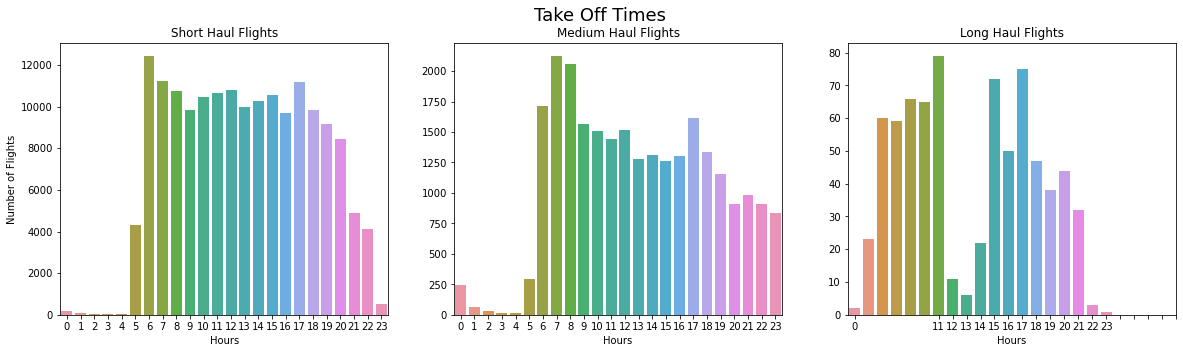

In [53]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
fig.suptitle('Take Off Times', size=18)

sns.barplot(ax=axes[0], x=df_short.index, y=df_short.values)
plt.xticks(df_short.index);
axes[0].set_title('Short Haul Flights')
axes[0].set_ylabel('Number of Flights')
axes[0].set_xlabel('Hours')

sns.barplot(ax=axes[1], x=df_medium.index, y=df_medium.values)
plt.xticks(df_medium.index);
axes[1].set_title('Medium Haul Flights')
axes[1].set_xlabel('Hours')


sns.barplot(ax=axes[2], x=df_long.index, y=df_long.values)
plt.xticks(df_long.index);
axes[2].set_title('Long Haul Flights')
axes[2].set_xlabel('Hours')

plt.show()